<a href="https://colab.research.google.com/github/gnilwobnnej/eurosat_image_classifier/blob/main/eurosat_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the required libraries
numpy, matplotlib, sklearn: Standard Python tools for numerical work, plotting, and evaluation.

tensorflow.keras: For building neural network models.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models


tensorflow_datasets (tfds): Easy access to datasets, such as EuroSAT.

EuroSAT RGB: A dataset of satellite images labeled by land use.

split: First 80% for training, last 20% for testing.

with_info: Includes metadata like label names.

as_supervised=True: Returns (image, label) pairs.

In [5]:
import tensorflow_datasets as tfds

dataset_name = "eurosat/rgb"
(ds_train, ds_test), ds_info = tfds.load(
    dataset_name,
    split = ['train[:80%]', 'train[80%:]'],
    with_info = True,
    as_supervised = True,
)


IMG_SIZE = 64

BATCH_SIZE = 32 (Sets a consistent image size and number of samples per batch.)

Resize each image.

Normalize pixel values to the 0–1 range.

map: Applies preprocess to each image-label pair.

batch: Groups samples into batches.

prefetch: Improves training performance by preparing the next batch in parallel.

In [6]:
IMG_SIZE = 64
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(1)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(1)

Conv2D + MaxPooling: Two convolutional layers extract spatial features.

Flatten + Dense: Fully connected layers for classification.

Final layer uses softmax for multi-class prediction.

The output size is dynamically based on number of classes from ds_info.

Adam: Popular optimizer.

Sparse categorical crossentropy: Used because labels are integer-encoded, not one-hot.

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(ds_info.features['label'].num_classes, activation= 'softmax')
])



model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Trains for 10 epochs using the train/test datasets.


In [9]:
history = model.fit(ds_train, epochs = 10, validation_data = ds_test)

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 173s 253ms/step - accuracy: 0.4651 - loss: 1.4125 - val_accuracy: 0.7352 - val_loss: 0.7603
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 191s 237ms/step - accuracy: 0.7347 - loss: 0.7522 - val_accuracy: 0.7578 - val_loss: 0.6633
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 169s 188ms/step - accuracy: 0.7874 - loss: 0.6043 - val_accuracy: 0.7844 - val_loss: 0.5957
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 139s 183ms/step - accuracy: 0.8212 - loss: 0.5107 - val_accuracy: 0.7869 - val_loss: 0.5942
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 140s 180ms/step - accuracy: 0.8455 - loss: 0.4313 - val_accuracy: 0.7959 - val_loss: 0.5668
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 126s 187ms/step - accuracy: 0.8702 - loss: 0.3593 - val_accuracy: 0.8172 - val_loss: 0.5485
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 142s 186ms/step - accuracy: 0.8916 - loss: 0.3136 - val_accuracy: 0.8280 - val_loss: 0.5563
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 171s 254ms/step - accuracy: 0.9062 -

Gets 1000 test samples.

Runs predictions.

Converts softmax scores to class labels with argmax.

Prints precision, recall, F1-score per class.

Confusion matrix shows true vs. predicted label distribution.

Uses Seaborn's heatmap for better visualization.

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
                      precision    recall  f1-score   support

          AnnualCrop       0.84      0.92      0.88        97
              Forest       0.94      0.97      0.96       105
HerbaceousVegetation       0.69      0.77      0.73       110
             Highway       0.65      0.68      0.67        98
          Industrial       0.87      0.94      0.90        95
             Pasture       0.79      0.81      0.80        67
       PermanentCrop       0.69      0.54      0.60        84
         Residential       0.92      0.97      0.95       118
               River       0.85      0.71      0.77       117
             SeaLake       0.99      0.93      0.96       109

            accuracy                           0.83      1000
           macro avg       0.82      0.82      0.82      1000
        weighted avg       0.83      0.83      0.83      1000



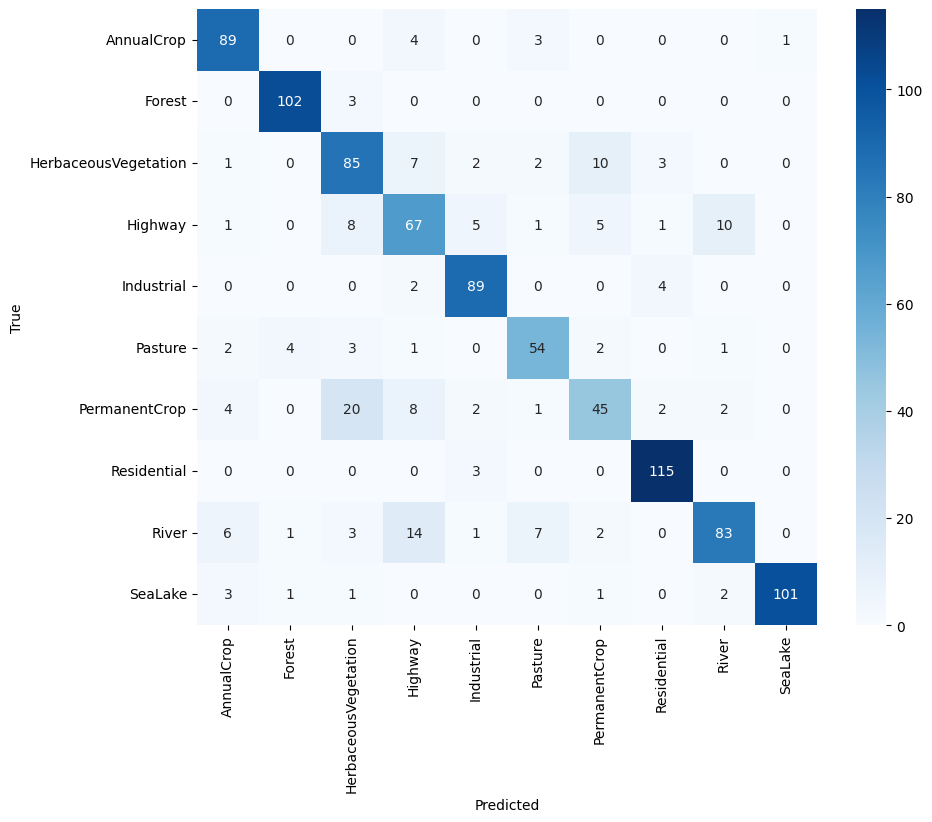

In [10]:
test_images, test_labels = next(iter(ds_test.unbatch().batch(1000)))
preds = model.predict(test_images)
pred_labels = np.argmax(preds, axis = 1)

print(classification_report(test_labels, pred_labels, target_names=ds_info.features['label'].names))

import seaborn as sns
cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=ds_info.features['label'].names, yticklabels=ds_info.features['label'].names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Displays 25 image predictions.

Titles show true vs. predicted label.

Green = correct, Red = incorrect.

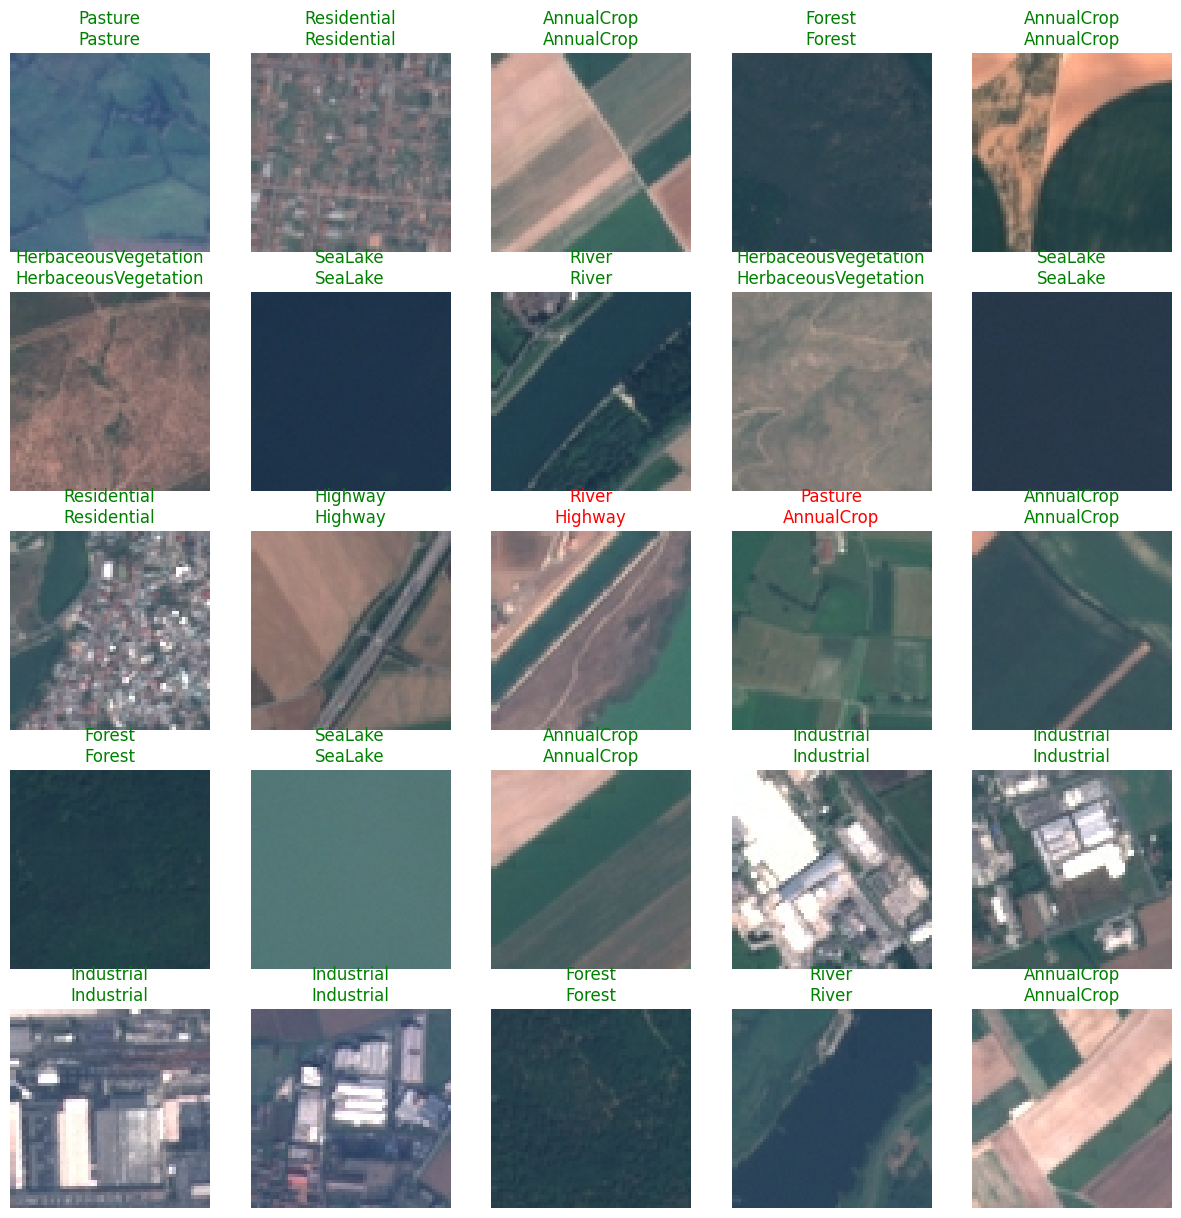

In [14]:
def show_predictions(model, images, labels, class_names):
  plt.figure(figsize=(15, 15))
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    # Display the individual image from the batch
    plt.imshow(images[i])
    true = class_names[labels[i]]
    pred = class_names[pred_labels[i]] # Use pred_labels here
    color = "green" if true == pred else "red"
    plt.title(f"{true}\n{pred}", color=color)
    plt.axis("off")
  plt.show()

show_predictions(model, test_images.numpy(), test_labels.numpy(), ds_info.features['label'].names)

#**What we learn from this**
* How well the CNN model classifies different types of terrain.

* Which classes are often confused (via the confusion matrix).

* Where the model makes systematic errors (via visual inspection).